In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [4]:
file_path = "files/In house exam data set (dummy).csv"
data = pd.read_csv(file_path)

In [7]:
data.shape

(69, 21)

In [5]:
data_info = {
    "Number of Rows": data.shape[0],
    "Number of Columns": data.shape[1],
    "Column Names": data.columns.tolist()
}

data_info

{'Number of Rows': 69,
 'Number of Columns': 21,
 'Column Names': ['Date',
  'Temp.',
  'pH',
  'ORP',
  'DO',
  'Transpa.',
  'E-NH4-N',
  'E-NO3-N',
  'E-NO2-N',
  'SS',
  'BOD',
  'C-BOD',
  'N-BOD',
  'T-N',
  'NH4-N',
  'NOx-N',
  'NO3-N',
  'NO2-N',
  'Unnamed: 18',
  'Unnamed: 19',
  'Unnamed: 20']}

In [16]:
data["Date"].head()

0   2023-01-04
1   2023-01-11
2   2023-01-18
3   2023-01-25
4   2023-02-01
Name: Date, dtype: datetime64[ns]

In [5]:
data["Date"] = pd.to_datetime(data['Date'] + '-2023', format='%d-%b-%Y')

In [15]:
data["Date"].head()

0   2023-01-04
1   2023-01-11
2   2023-01-18
3   2023-01-25
4   2023-02-01
Name: Date, dtype: datetime64[ns]

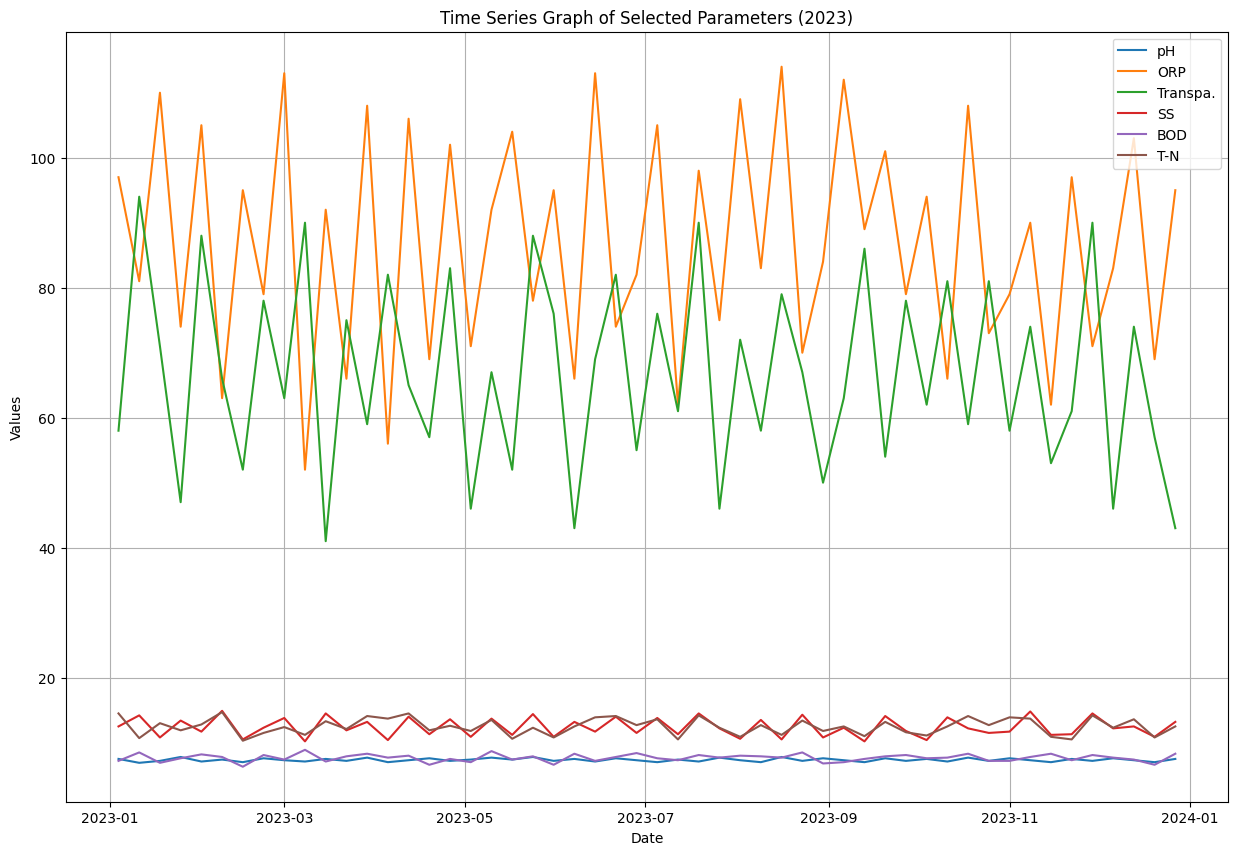

In [6]:
columns_to_plot = ['pH', 'ORP', 'Transpa.', 'SS', 'BOD', 'T-N']
plt.figure(figsize=(15, 10))
for col in columns_to_plot:
    plt.plot(data['Date'], data[col], label=col)

plt.title('Time Series Graph of Selected Parameters (2023)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

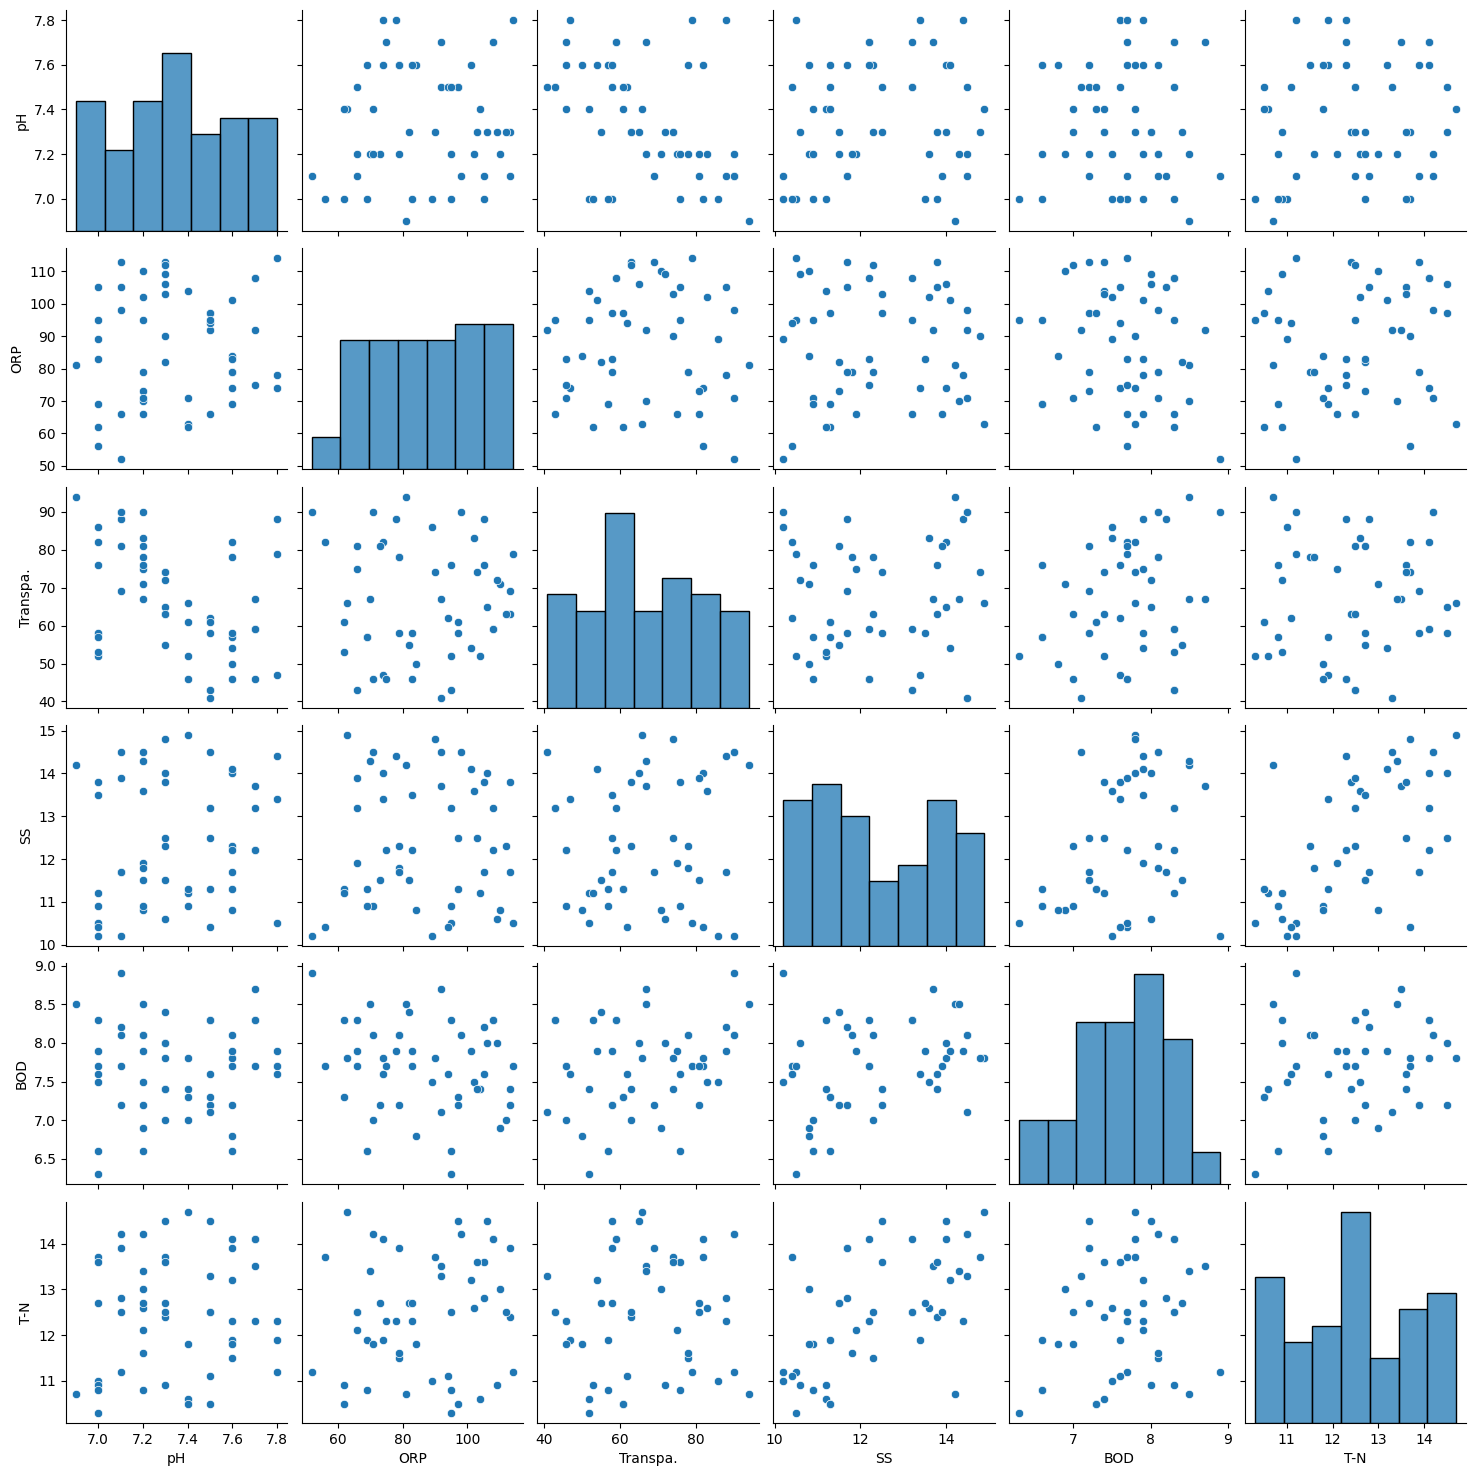

In [29]:
sns.pairplot(data[columns_to_plot])
plt.show()

ValueError: array must not contain infs or NaNs

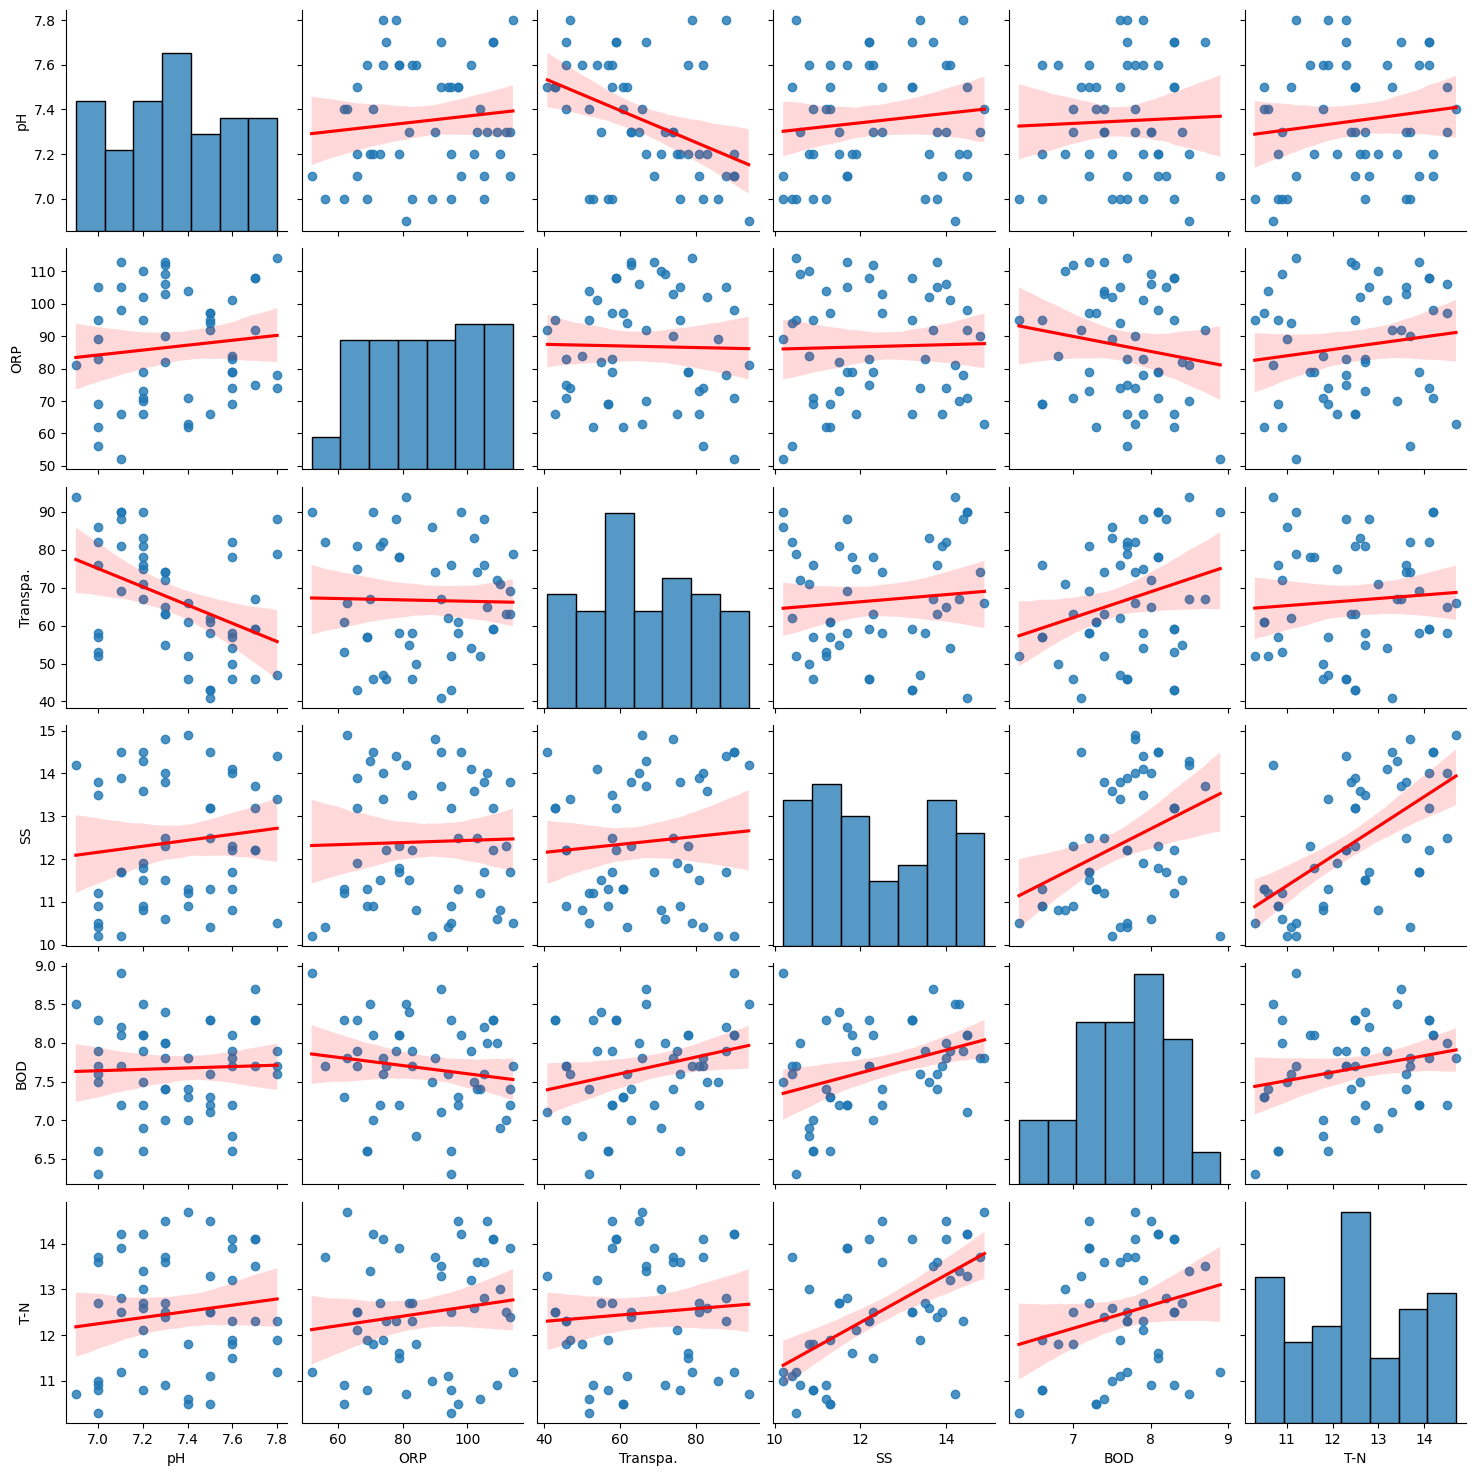

In [33]:
# 相関係数を計算し表示する関数
def corr_func(x, y, **kwargs):
    r = stats.pearsonr(x, y)[0]
    ax = plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(0.05, 0.9), xycoords=ax.transAxes)

# Seabornのpairplotを作成
pairplot = sns.pairplot(data[columns_to_plot], kind='reg', plot_kws={'line_kws': {'color': 'red'}})

# 非対角要素に相関係数を表示
pairplot.map_offdiag(corr_func)
plt.show()

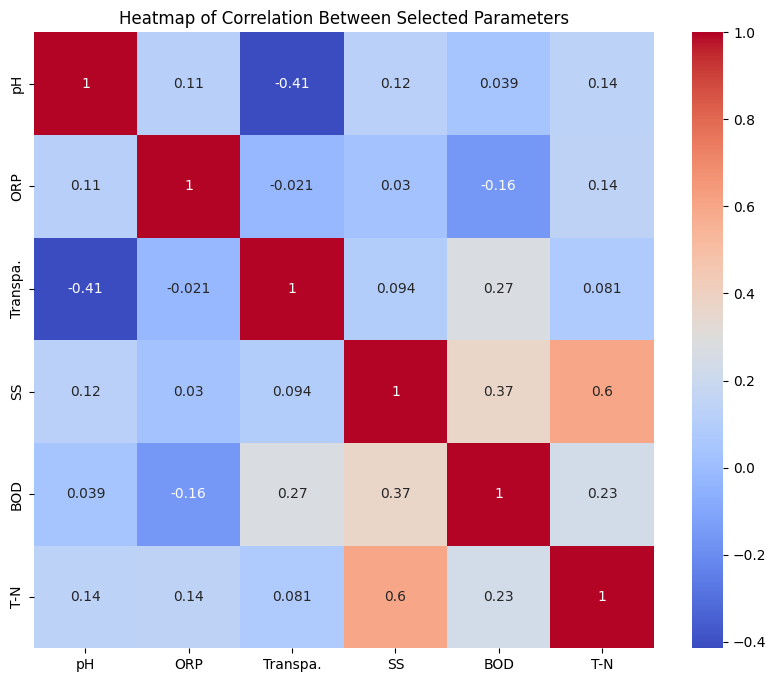

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[columns_to_plot].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Between Selected Parameters')
plt.show()

c:\shorikawa\program\time-series-analysis\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
c:\shorikawa\program\time-series-analysis\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
c:\shorikawa\program\time-series-analysis\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
c:\shorikawa\program\time-series-analysis\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\shorikawa\program\time-series-analysis\env\li

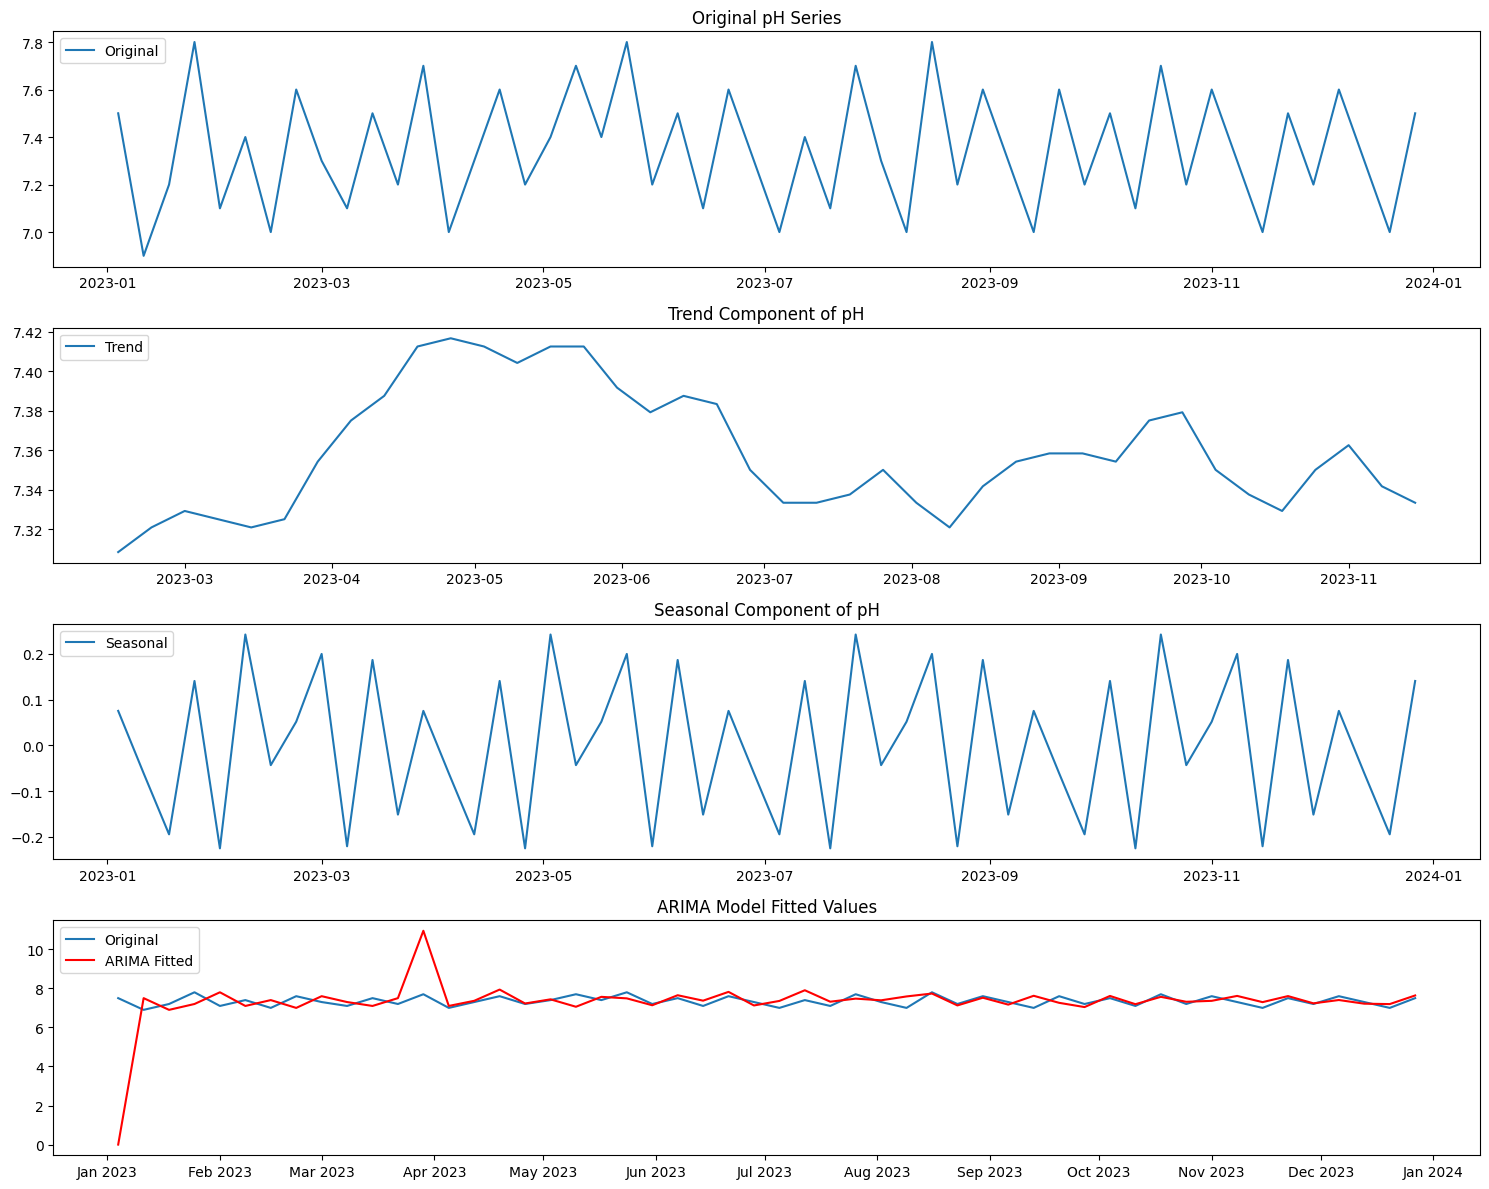

In [8]:
# Extracting pH data
pH_data = data[['Date', 'pH']].set_index('Date')

# Check for missing values
pH_data.isna().sum()

# Dropping rows with missing values for analysis
pH_data.dropna(inplace=True)

# Seasonal Decompose to analyze trend, seasonality, and residuals
decomposed = seasonal_decompose(pH_data['pH'], model='additive', period=12)

# ARIMA model for both trend and seasonality
# Choosing ARIMA parameters (p,d,q) can be done using AIC, BIC or grid search, here we use common parameters
arima_model = ARIMA(pH_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arima_result = arima_model.fit()

# Plotting the results
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Plotting original series
axes[0].plot(pH_data, label='Original')
axes[0].legend(loc='upper left')
axes[0].set_title('Original pH Series')

# Plotting trend component
axes[1].plot(decomposed.trend, label='Trend')
axes[1].legend(loc='upper left')
axes[1].set_title('Trend Component of pH')

# Plotting seasonal component
axes[2].plot(decomposed.seasonal, label='Seasonal')
axes[2].legend(loc='upper left')
axes[2].set_title('Seasonal Component of pH')

# Plotting ARIMA Predicted values
axes[3].plot(pH_data, label='Original')
axes[3].plot(arima_result.fittedvalues, label='ARIMA Fitted', color='red')
axes[3].legend(loc='upper left')
axes[3].set_title('ARIMA Model Fitted Values')
axes[3].xaxis.set_major_locator(mdates.MonthLocator())
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.show()

c:\shorikawa\program\time-series-analysis\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
c:\shorikawa\program\time-series-analysis\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
c:\shorikawa\program\time-series-analysis\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
c:\shorikawa\program\time-series-analysis\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters

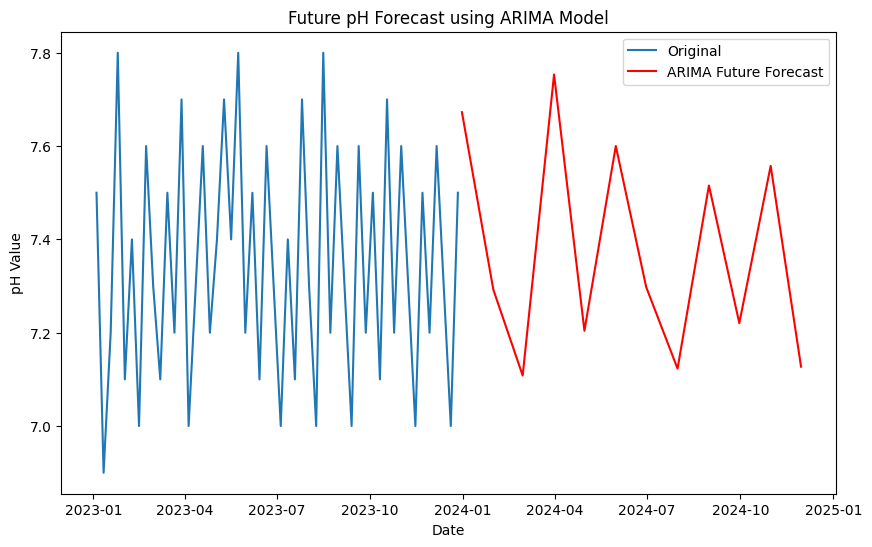

In [18]:
# Splitting the data into train and test sets for ARIMA and Bayesian inference
train_size = int(len(pH_data) * 0.8)
train, test = pH_data[0:train_size], pH_data[train_size:]

# ARIMA model for forecasting
arima_forecast_model = ARIMA(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arima_forecast_result = arima_forecast_model.fit()

# Forecasting future values using ARIMA model
arima_future_forecast = arima_forecast_result.get_forecast(steps=12)  # Forecasting next 12 periods

# Plotting the future forecast
plt.figure(figsize=(10, 6))

# Plotting the original series
plt.plot(pH_data, label='Original')

# Plotting the forecasted values
plt.plot(pd.date_range(pH_data.index[-1], periods=12, freq='M'),  # Generating future dates
         arima_future_forecast.predicted_mean, 
         color='red', 
         label='ARIMA Future Forecast')


plt.title('Future pH Forecast using ARIMA Model')
plt.xlabel('Date')
plt.ylabel('pH Value')
plt.legend()
plt.show()


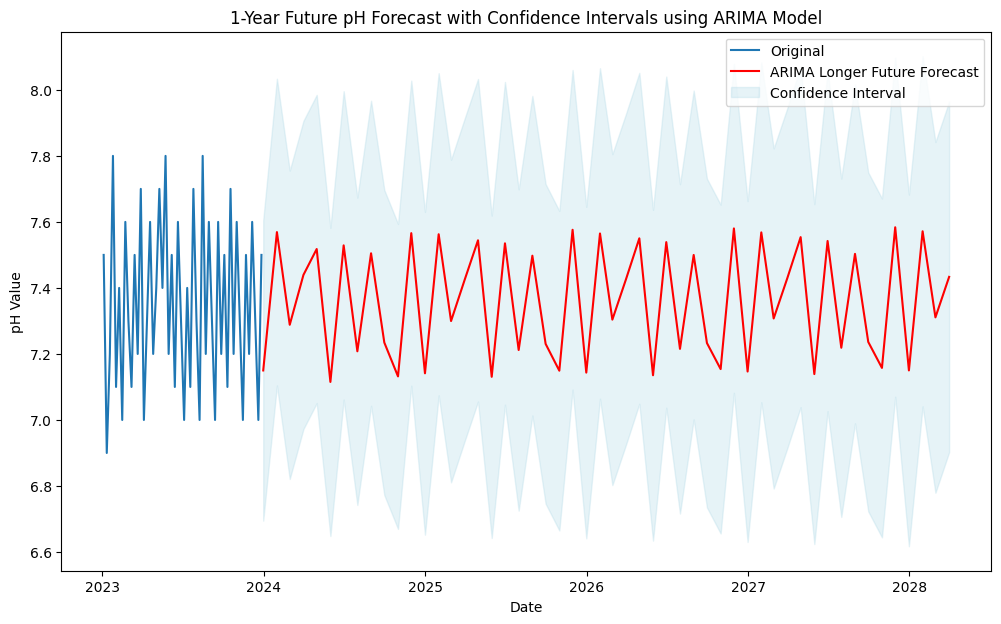

In [21]:
# Forecasting future values using the full ARIMA model for a longer period (1 year / 52 weeks)
arima_longer_future_forecast = arima_full_result.get_forecast(steps=52)  # Forecasting next 52 periods (1 year)

# Extracting the confidence intervals for the longer forecast
longer_forecast_conf_int = arima_longer_future_forecast.conf_int()

# Plotting the longer future forecast with confidence intervals
plt.figure(figsize=(12, 7))

# Plotting the original series
plt.plot(pH_data, label='Original')

# Plotting the forecasted values for the longer period
longer_future_dates = pd.date_range(pH_data.index[-1], periods=52, freq='M')
plt.plot(
    longer_future_dates, arima_longer_future_forecast.predicted_mean, color='red', label='ARIMA Longer Future Forecast'
    )

# Plotting the confidence intervals for the longer period
plt.fill_between(longer_future_dates, 
                 longer_forecast_conf_int.iloc[:, 0], 
                 longer_forecast_conf_int.iloc[:, 1], 
                 color='lightblue', alpha=0.3, label='Confidence Interval')

plt.title('1-Year Future pH Forecast with Confidence Intervals using ARIMA Model')
plt.xlabel('Date')
plt.ylabel('pH Value')
plt.legend()
plt.show()


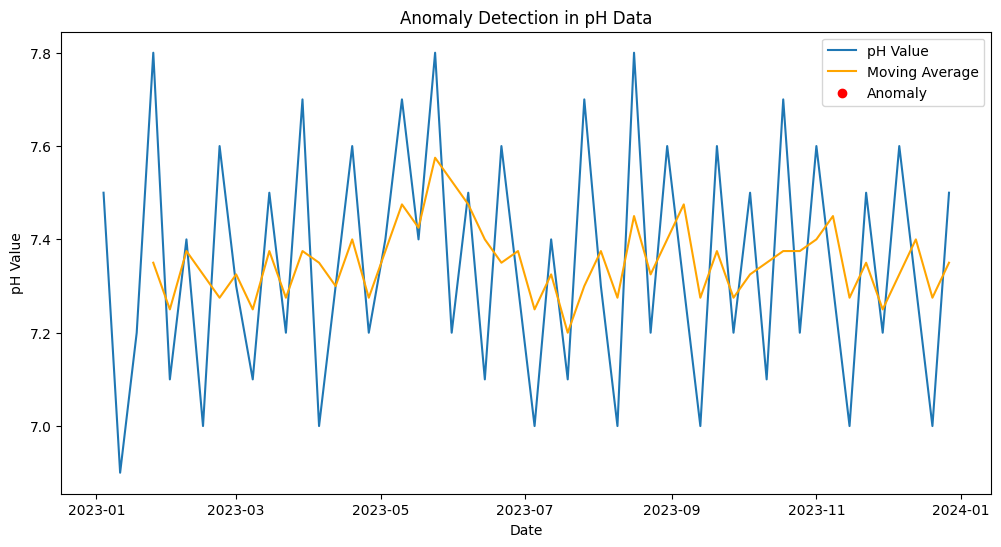

In [22]:
# Calculating moving average and moving standard deviation
window = 4  # Window size for moving calculations
pH_data['Moving_Avg'] = pH_data['pH'].rolling(window=window).mean()
pH_data['Moving_Std'] = pH_data['pH'].rolling(window=window).std()

# Defining a threshold for anomaly detection (e.g., 2 standard deviations from the moving average)
threshold = 2
pH_data['Anomaly'] = (pH_data['pH'] > pH_data['Moving_Avg'] + threshold * pH_data['Moving_Std']) | \
                     (pH_data['pH'] < pH_data['Moving_Avg'] - threshold * pH_data['Moving_Std'])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(pH_data['pH'], label='pH Value')
plt.plot(pH_data['Moving_Avg'], color='orange', label='Moving Average')

# Highlighting the anomalies
plt.scatter(pH_data.index[pH_data['Anomaly']], pH_data['pH'][pH_data['Anomaly']], color='red', label='Anomaly')

plt.title('Anomaly Detection in pH Data')
plt.xlabel('Date')
plt.ylabel('pH Value')
plt.legend()
plt.show()

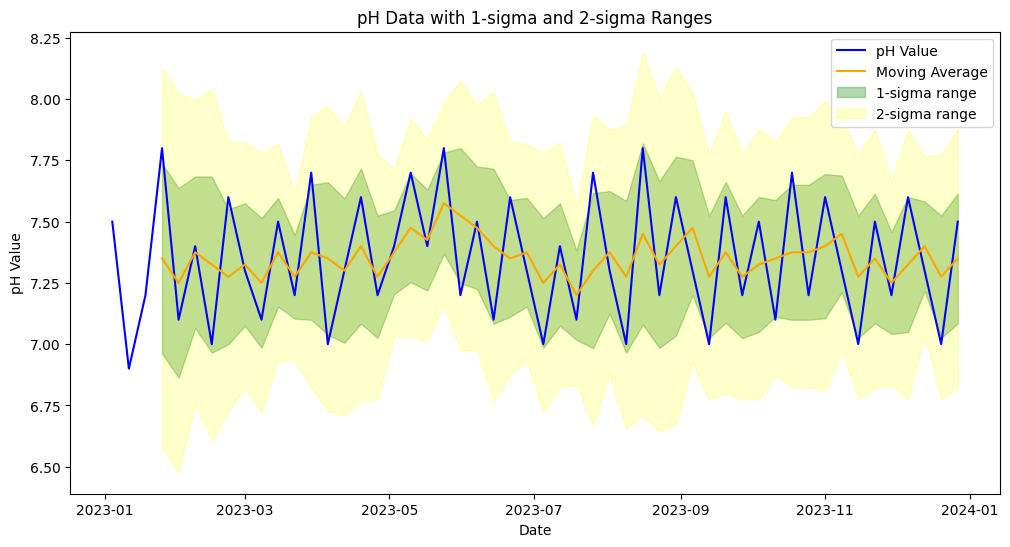

In [23]:
# Calculating 1-sigma and 2-sigma boundaries
pH_data['1_sigma_upper'] = pH_data['Moving_Avg'] + 1 * pH_data['Moving_Std']
pH_data['1_sigma_lower'] = pH_data['Moving_Avg'] - 1 * pH_data['Moving_Std']
pH_data['2_sigma_upper'] = pH_data['Moving_Avg'] + 2 * pH_data['Moving_Std']
pH_data['2_sigma_lower'] = pH_data['Moving_Avg'] - 2 * pH_data['Moving_Std']

# Plotting the results with 1-sigma and 2-sigma boundaries
plt.figure(figsize=(12, 6))
plt.plot(pH_data['pH'], label='pH Value', color='blue')
plt.plot(pH_data['Moving_Avg'], color='orange', label='Moving Average')

# 1-sigma boundaries
plt.fill_between(pH_data.index, pH_data['1_sigma_lower'], pH_data['1_sigma_upper'], color='green', alpha=0.3, label='1-sigma range')

# 2-sigma boundaries
plt.fill_between(pH_data.index, pH_data['2_sigma_lower'], pH_data['2_sigma_upper'], color='yellow', alpha=0.2, label='2-sigma range')

plt.title('pH Data with 1-sigma and 2-sigma Ranges')
plt.xlabel('Date')
plt.ylabel('pH Value')
plt.legend()
plt.show()

C:\Users\shhorikawa.NIKKO\AppData\Local\Temp\ipykernel_10252\2588060619.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pH_data['Rolling_Mean'] = pH_data['pH'].rolling(window=4).mean().fillna(method='bfill')
c:\shorikawa\program\time-series-analysis\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


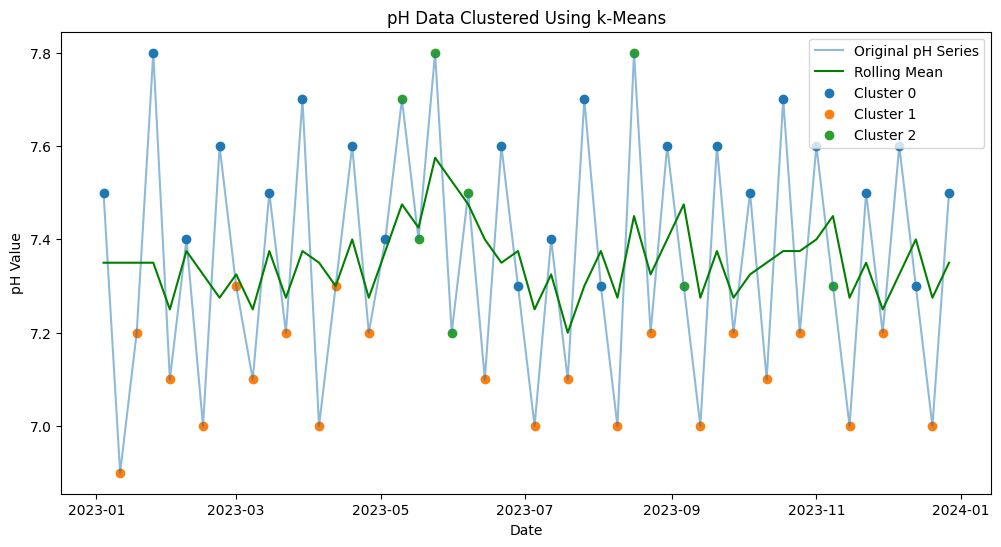

In [27]:
# Preparing the data for clustering
# Using rolling mean (moving average) as a feature for clustering
pH_data['Rolling_Mean'] = pH_data['pH'].rolling(window=4).mean().fillna(method='bfill')

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pH_data[['pH', 'Rolling_Mean']])

# Applying k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Arbitrary choice of 3 clusters
pH_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Plotting the clustered data
plt.figure(figsize=(12, 6))
plt.plot(pH_data.index, pH_data['pH'], label='Original pH Series', alpha=0.5)
plt.plot(pH_data.index, pH_data['Rolling_Mean'], label='Rolling Mean', color='green')
for cluster in pH_data['Cluster'].unique():
    clustered_data = pH_data[pH_data['Cluster'] == cluster]
    plt.scatter(clustered_data.index, clustered_data['pH'], label=f'Cluster {cluster}')

plt.title('pH Data Clustered Using k-Means')
plt.xlabel('Date')
plt.ylabel('pH Value')
plt.legend()
plt.show()

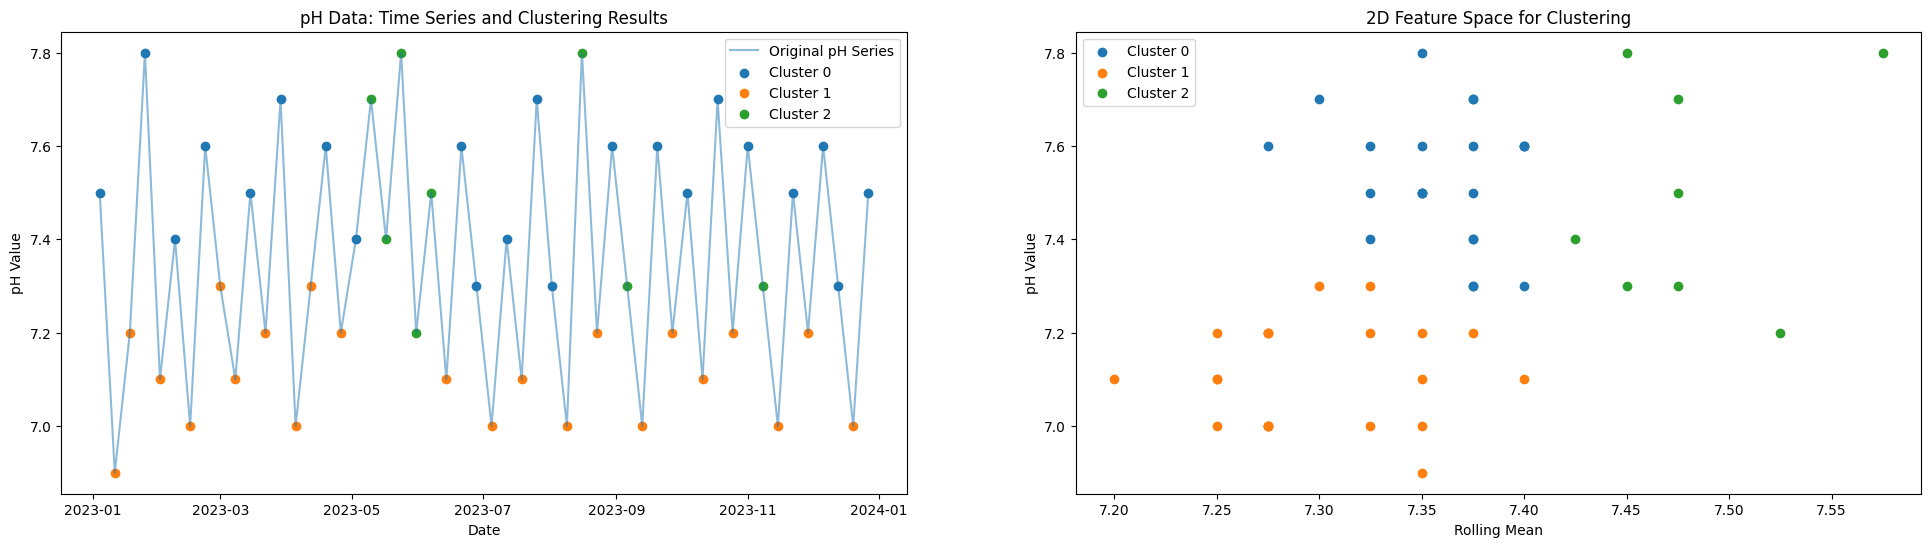

In [28]:
# pHデータの時系列プロット
plt.figure(figsize=(24, 6))

# 時系列データとクラスタリング結果のプロット
plt.subplot(1, 2, 1)
plt.plot(pH_data.index, pH_data['pH'], label='Original pH Series', alpha=0.5)
for cluster in pH_data['Cluster'].unique():
    clustered_data = pH_data[pH_data['Cluster'] == cluster]
    plt.scatter(clustered_data.index, clustered_data['pH'], label=f'Cluster {cluster}')
plt.title('pH Data: Time Series and Clustering Results')
plt.xlabel('Date')
plt.ylabel('pH Value')
plt.legend()

# 特徴量の2次元プロット
plt.subplot(1, 2, 2)
for cluster in pH_data['Cluster'].unique():
    clustered_data = pH_data[pH_data['Cluster'] == cluster]
    plt.scatter(clustered_data['Rolling_Mean'], clustered_data['pH'], label=f'Cluster {cluster}')
plt.title('2D Feature Space for Clustering')
plt.xlabel('Rolling Mean')
plt.ylabel('pH Value')
plt.legend()

plt.show()